In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [80]:
df = pd.read_csv('../data/processed/telco_cleaned.csv')

In [81]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [82]:
print("Jumlah baris dan Kolom:", df.shape)
print("Kolom yang ada pada dataset:\n", df.columns)
print("Sampel data:")
display(df.head(5))

Jumlah baris dan Kolom: (7043, 20)
Kolom yang ada pada dataset:
 Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
Sampel data:


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [83]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [84]:
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          2
InternetService        3
OnlineSecurity         2
OnlineBackup           2
DeviceProtection       2
TechSupport            2
StreamingTV            2
StreamingMovies        2
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6534
Churn                  2
dtype: int64

In [85]:
churnN = df['Churn'] == 'No'
churnY = df['Churn'] == 'Yes'

print("Jumlah pengguna tidak Churn: ", churnN.sum())
print("Jumlah pengguna Churn: ", churnY.sum()) 

churn_rate = churnY.sum() / (churnN.sum() + churnY.sum())
print("Churn Rate: ", str(churn_rate.round(2)))

Jumlah pengguna tidak Churn:  5174
Jumlah pengguna Churn:  1869
Churn Rate:  0.27


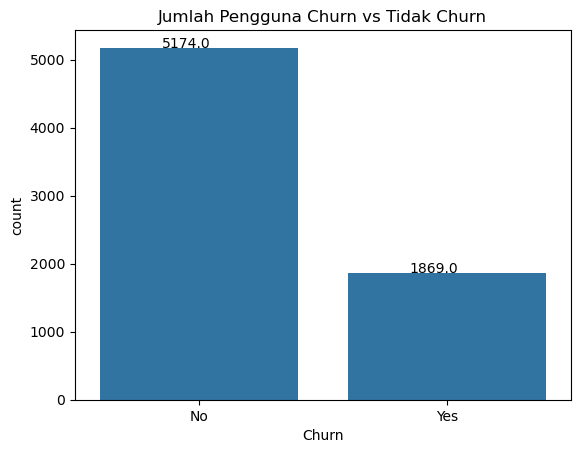

In [86]:
ax = sns.countplot(x='Churn', data=df)

for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x() + 0.25, p.get_height() + 0.01))

ax.set_title('Jumlah Pengguna Churn vs Tidak Churn')

plt.show()

In [87]:
churnNCharges = df[ df['Churn'] == 'No']['TotalCharges'].sum()

churnYCharges = df[ df['Churn'] == 'Yes']['TotalCharges'].sum()

print("Total Charges untuk pengguna tidak Churn: ", churnNCharges)
print("Total Charges untuk pengguna Churn: ", churnYCharges)
churnChargesRate = churnYCharges / (churnNCharges + churnYCharges)
print("Churn Charges Rate: ", churnChargesRate)


Total Charges untuk pengguna tidak Churn:  13193697.399999999
Total Charges untuk pengguna Churn:  2862926.9
Churn Charges Rate:  0.17830191742108584


  Churn  TotalCharges
0    No    13193697.4
1   Yes     2862926.9


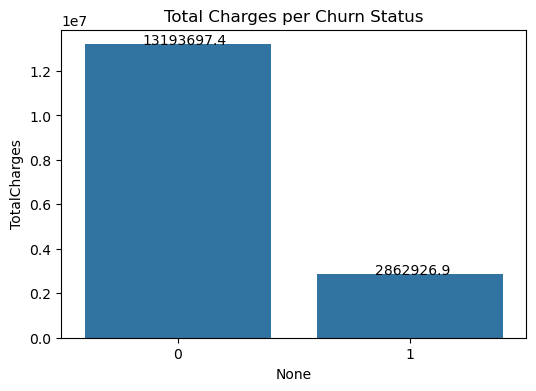

In [88]:
df_charges = df.groupby('Churn')['TotalCharges'].sum().reset_index()
print(df_charges)

plt.figure(figsize=(6,4))
ax = sns.barplot(x = df_charges.index, y='TotalCharges', data = df_charges)
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x() + 0.25, p.get_height() + 0.01))

ax.set_title('Total Charges per Churn Status')
plt.show()

In [89]:
demographic_columns = df.loc[df['Churn'] == 'Yes', ['gender', 'SeniorCitizen', 'Partner', 'Dependents']]
demographic_columns.head()

,gender,SeniorCitizen,Partner,Dependents
2,Male,0,No,No
4,Female,0,No,No
5,Female,0,No,No
8,Female,0,Yes,No
13,Male,0,No,No


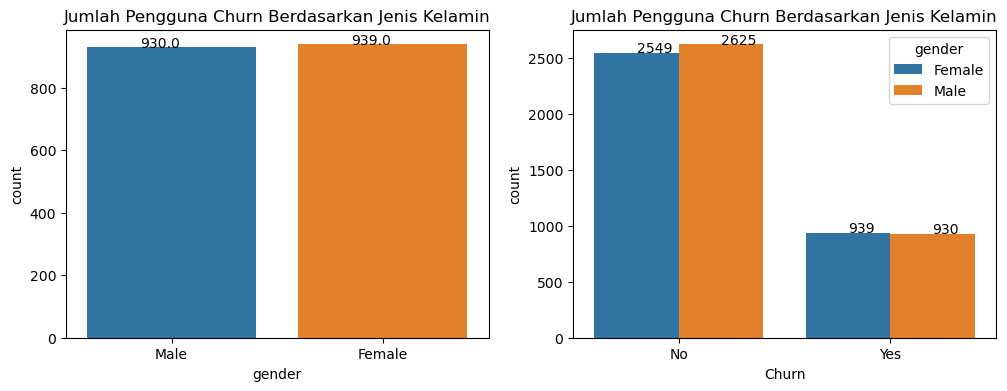

In [90]:
plt.figure(figsize=(12, 4))
ax = plt.subplot (121)
ax = sns.countplot (x = 'gender', data = demographic_columns, hue = 'gender', order = ['Male', 'Female'])

for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x() + 0.25, p.get_height() + 0.01))

ax.set_title('Jumlah Pengguna Churn Berdasarkan Jenis Kelamin')

ax = plt.subplot (122)
ax = sns.countplot (x = 'Churn', data = df, hue = 'gender')

for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width()/2, p.get_height() + 0.01))

ax.set_title('Jumlah Pengguna Churn Berdasarkan Jenis Kelamin')

plt.show()

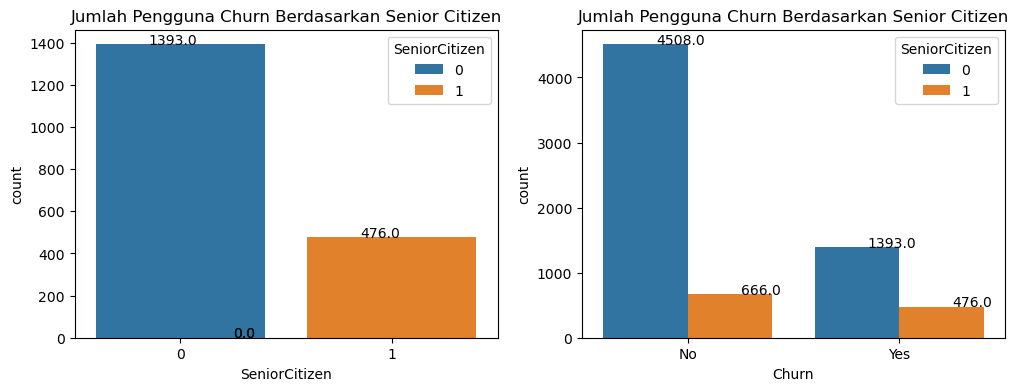

In [91]:
plt.figure(figsize=(12, 4))
ax = plt.subplot (121)
ax = sns.countplot (x = 'SeniorCitizen', hue = 'SeniorCitizen', data = demographic_columns)

for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x() + 0.25, p.get_height() + 0.01))

ax.set_title('Jumlah Pengguna Churn Berdasarkan Senior Citizen')

ax = plt.subplot (122)
ax = sns.countplot (x = 'Churn', data = df, hue = 'SeniorCitizen')

for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x() + 0.25, p.get_height() + 0.01))

ax.set_title('Jumlah Pengguna Churn Berdasarkan Senior Citizen')

plt.show()

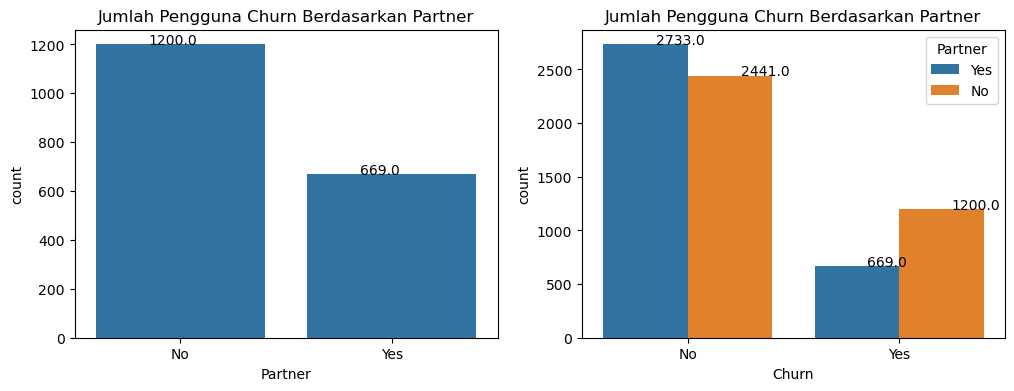

In [92]:
plt.figure(figsize=(12, 4))
ax = plt.subplot (121)
ax = sns.countplot (x = 'Partner', data = demographic_columns, order = ['No', 'Yes'])

for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x() + 0.25, p.get_height() + 0.01))

ax.set_title('Jumlah Pengguna Churn Berdasarkan Partner')

ax = plt.subplot (122)
ax = sns.countplot (x = 'Churn', data = df, hue = 'Partner', order = ['No', 'Yes'])

for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x() + 0.25, p.get_height() + 0.01))

ax.set_title('Jumlah Pengguna Churn Berdasarkan Partner')

plt.show()

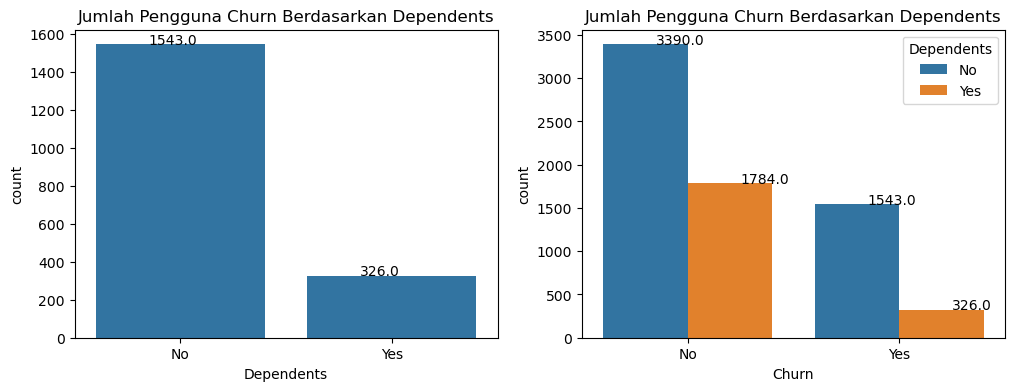

In [93]:
plt.figure(figsize=(12, 4))
ax = plt.subplot (121)
ax = sns.countplot (x = 'Dependents', data = demographic_columns, order = ['No', 'Yes'])

for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x() + 0.25, p.get_height() + 0.01))

ax.set_title('Jumlah Pengguna Churn Berdasarkan Dependents')

ax = plt.subplot (122)
ax = sns.countplot (x = 'Churn', data = df, hue = 'Dependents')

for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x() + 0.25, p.get_height() + 0.01))

ax.set_title('Jumlah Pengguna Churn Berdasarkan Dependents')

plt.show()

## Hubungan antara Churn dan Service

In [94]:
services = df.loc[df['Churn'] == 'Yes', ['PhoneService','MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']]
services.head()

,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
2,Yes,No,DSL,Yes,Yes,No,No,No,No
4,Yes,No,Fiber optic,No,No,No,No,No,No
5,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes
8,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes
13,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes


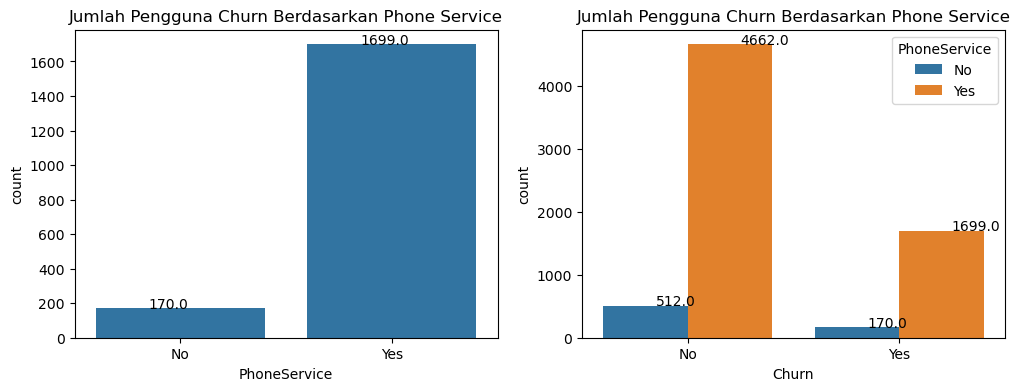

In [95]:
plt.figure(figsize=(12, 4))
ax = plt.subplot (121)
ax = sns.countplot (x = 'PhoneService', data = services, order = ['No', 'Yes'])

for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x() + 0.25, p.get_height() + 0.01))

ax.set_title('Jumlah Pengguna Churn Berdasarkan Phone Service')

ax = plt.subplot (122)
ax = sns.countplot (x = 'Churn', data = df, hue = 'PhoneService')

for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x() + 0.25, p.get_height() + 0.01))

ax.set_title('Jumlah Pengguna Churn Berdasarkan Phone Service')

plt.show()

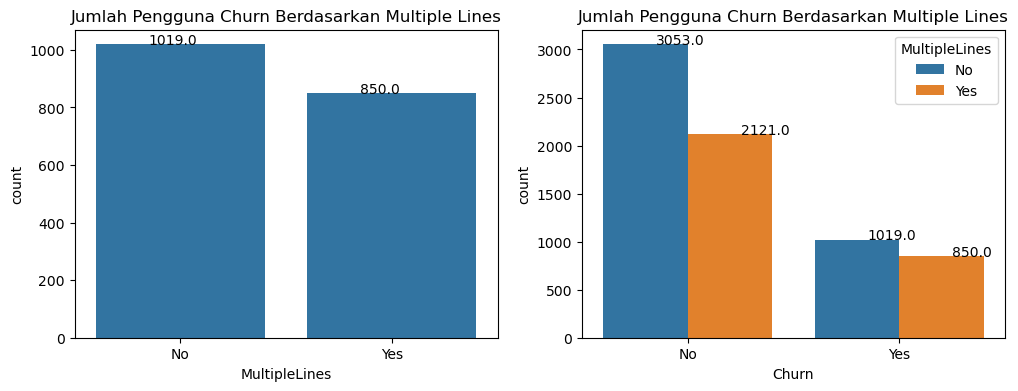

In [96]:
plt.figure(figsize=(12, 4))
ax = plt.subplot (121)
ax = sns.countplot (x = 'MultipleLines', data = services, order = ['No', 'Yes'])

for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x() + 0.25, p.get_height() + 0.01))

ax.set_title('Jumlah Pengguna Churn Berdasarkan Multiple Lines')

ax = plt.subplot (122)
ax = sns.countplot (x = 'Churn', data = df, hue = 'MultipleLines')

for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x() + 0.25, p.get_height() + 0.01))

ax.set_title('Jumlah Pengguna Churn Berdasarkan Multiple Lines')

plt.show()

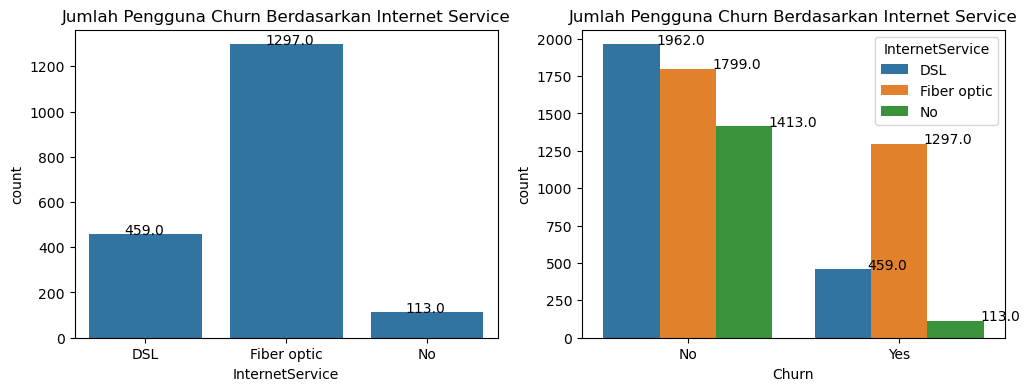

In [97]:
plt.figure(figsize=(12, 4))
ax = plt.subplot (121)
ax = sns.countplot (x = 'InternetService', data = services)

for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x() + 0.25, p.get_height() + 0.01))

ax.set_title('Jumlah Pengguna Churn Berdasarkan Internet Service')

ax = plt.subplot (122)
ax = sns.countplot (x = 'Churn', data = df, hue = 'InternetService')

for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x() + 0.25, p.get_height() + 0.01))

ax.set_title('Jumlah Pengguna Churn Berdasarkan Internet Service')

plt.show()

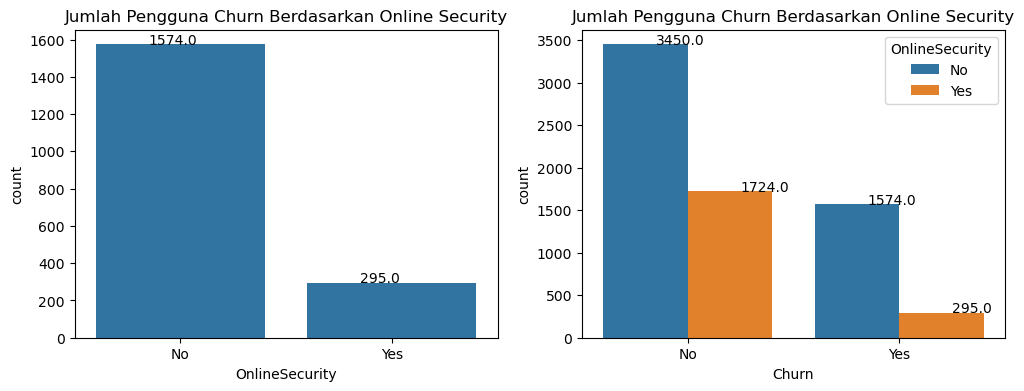

In [98]:
plt.figure(figsize=(12, 4))
ax = plt.subplot (121)
ax = sns.countplot (x = 'OnlineSecurity', data = services, order = ['No', 'Yes'])

for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x() + 0.25, p.get_height() + 0.01))

ax.set_title('Jumlah Pengguna Churn Berdasarkan Online Security')

ax = plt.subplot (122)
ax = sns.countplot (x = 'Churn', data = df, hue = 'OnlineSecurity')

for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x() + 0.25, p.get_height() + 0.01))

ax.set_title('Jumlah Pengguna Churn Berdasarkan Online Security')

plt.show()

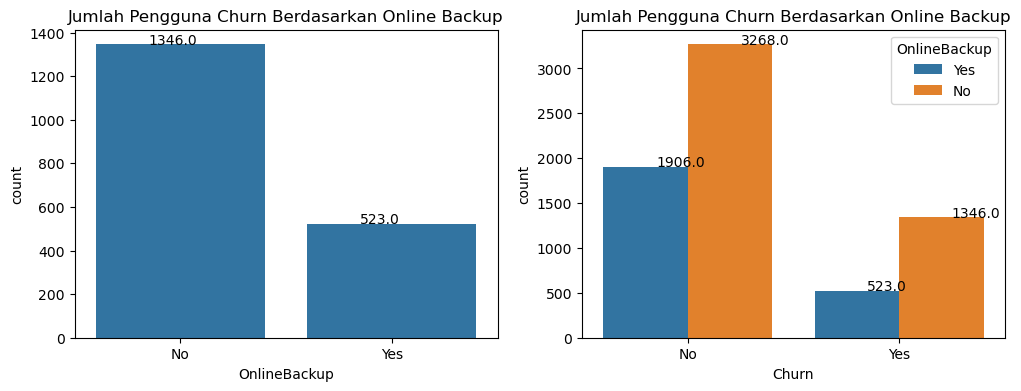

In [99]:
plt.figure(figsize=(12, 4))
ax = plt.subplot (121)
ax = sns.countplot (x = 'OnlineBackup', data = services, order = ['No', 'Yes'])

for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x() + 0.25, p.get_height() + 0.01))

ax.set_title('Jumlah Pengguna Churn Berdasarkan Online Backup')

ax = plt.subplot (122)
ax = sns.countplot (x = 'Churn', data = df, hue = 'OnlineBackup')

for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x() + 0.25, p.get_height() + 0.01))

ax.set_title('Jumlah Pengguna Churn Berdasarkan Online Backup')

plt.show()

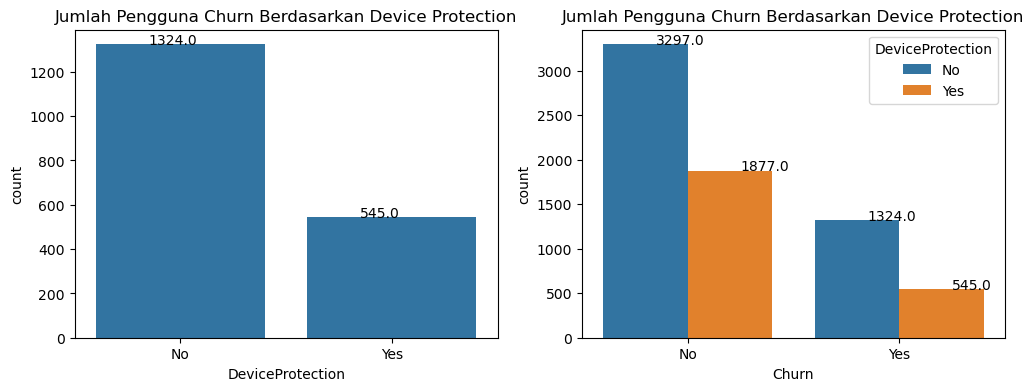

In [100]:
plt.figure(figsize=(12, 4))
ax = plt.subplot (121)
ax = sns.countplot (x = 'DeviceProtection', data = services)

for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x() + 0.25, p.get_height() + 0.01))

ax.set_title('Jumlah Pengguna Churn Berdasarkan Device Protection')

ax = plt.subplot (122)
ax = sns.countplot (x = 'Churn', data = df, hue = 'DeviceProtection')

for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x() + 0.25, p.get_height() + 0.01))

ax.set_title('Jumlah Pengguna Churn Berdasarkan Device Protection')

plt.show()

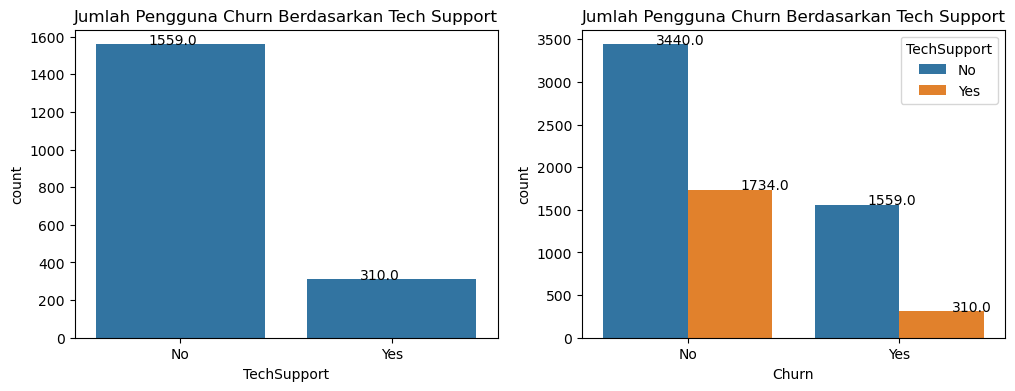

In [101]:
plt.figure(figsize=(12, 4))
ax = plt.subplot (121)
ax = sns.countplot (x = 'TechSupport', data = services)

for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x() + 0.25, p.get_height() + 0.01))

ax.set_title('Jumlah Pengguna Churn Berdasarkan Tech Support')

ax = plt.subplot (122)
ax = sns.countplot (x = 'Churn', data = df, hue = 'TechSupport')

for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x() + 0.25, p.get_height() + 0.01))

ax.set_title('Jumlah Pengguna Churn Berdasarkan Tech Support')

plt.show()

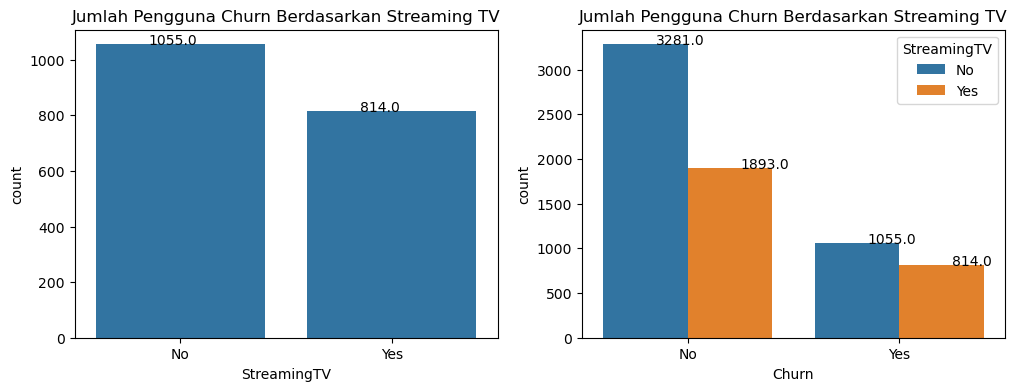

In [102]:
plt.figure(figsize=(12, 4))
ax = plt.subplot (121)
ax = sns.countplot (x = 'StreamingTV', data = services)

for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x() + 0.25, p.get_height() + 0.01))

ax.set_title('Jumlah Pengguna Churn Berdasarkan Streaming TV')

ax = plt.subplot (122)
ax = sns.countplot (x = 'Churn', data = df, hue = 'StreamingTV')

for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x() + 0.25, p.get_height() + 0.01))

ax.set_title('Jumlah Pengguna Churn Berdasarkan Streaming TV')

plt.show()

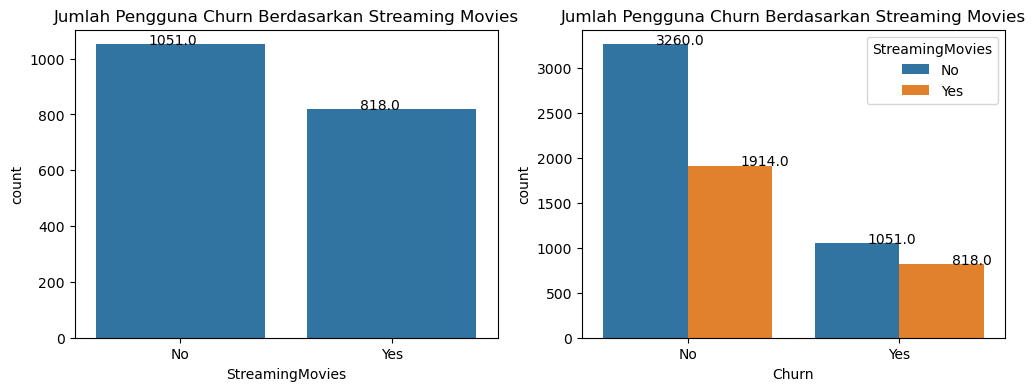

In [103]:
plt.figure(figsize=(12, 4))
ax = plt.subplot (121)
ax = sns.countplot (x = 'StreamingMovies', data = services)

for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x() + 0.25, p.get_height() + 0.01))

ax.set_title('Jumlah Pengguna Churn Berdasarkan Streaming Movies')

ax = plt.subplot (122)
ax = sns.countplot (x = 'Churn', data = df, hue = 'StreamingMovies')

for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x() + 0.25, p.get_height() + 0.01))

ax.set_title('Jumlah Pengguna Churn Berdasarkan Streaming Movies')

plt.show()

3rd Observation : Relation betwen churn and services:
Phone service - majority with
Multiple lines - no discernible difference
Fibre optic internet - majority with
Online security - majority without
Online Backup - majority without
Device protection - majority without
Tech support - majority without
streaming TV - no discernible difference
streaming movies - no discernible difference
It appears that most subscribers who churn sign up to be users of services only, but do not appreciate the value-added services of their telco such as tech support, online security, online backup, device protection. Hence there is little stickiness.

## Hubungan antara Churn dan Akun Customer

In [104]:
cust = df.loc[df['Churn'] == 'Yes', ['tenure', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges']]
cust.head()

,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
2,2,Month-to-month,Yes,Mailed check,53.85
4,2,Month-to-month,Yes,Electronic check,70.70
5,8,Month-to-month,Yes,Electronic check,99.65
8,28,Month-to-month,Yes,Electronic check,104.80
13,49,Month-to-month,Yes,Bank transfer (automatic),103.70


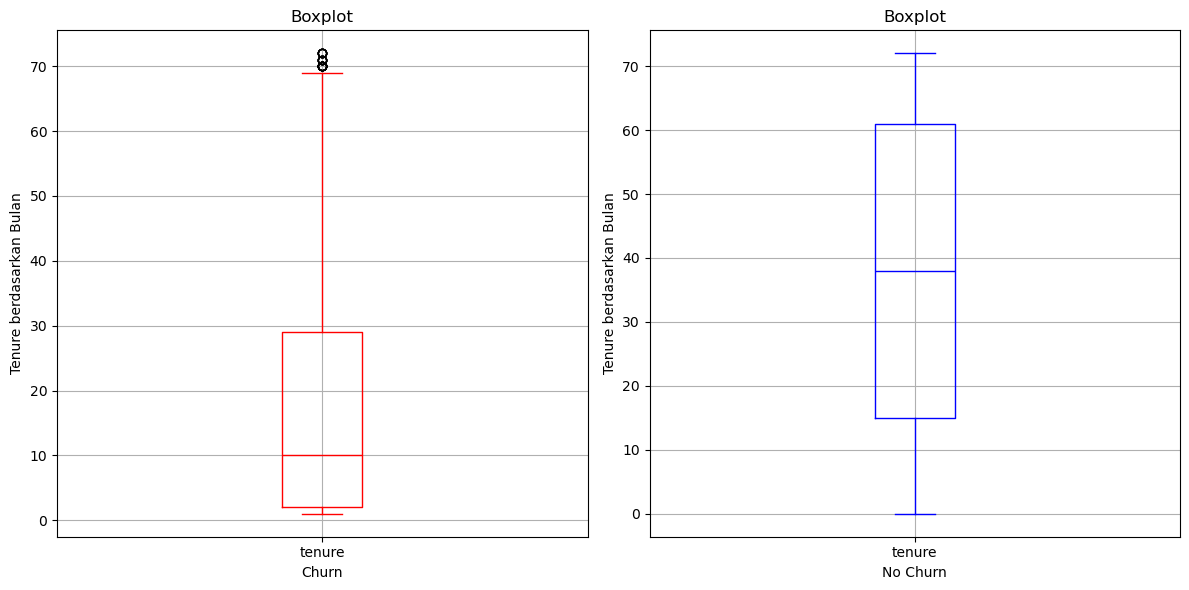

In [105]:
custtetap = df.loc[df['Churn'] == 'No', ['tenure', 'MonthlyCharges']]

dist1 = cust['tenure']
dist2 = custtetap['tenure']

fig = plt.figure(figsize=(12, 6))

ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

dist1.plot(kind='box', color = 'red', vert = True, ax=ax0, grid=True)
ax0.set_title('Boxplot')
ax0.set_xlabel('Churn')
ax0.set_ylabel('Tenure berdasarkan Bulan')

dist2.plot(kind='box', color = 'blue', vert = True, ax=ax1, grid=True)
ax1.set_title('Boxplot')
ax1.set_xlabel('No Churn')
ax1.set_ylabel('Tenure berdasarkan Bulan')

plt.tight_layout()
plt.show()

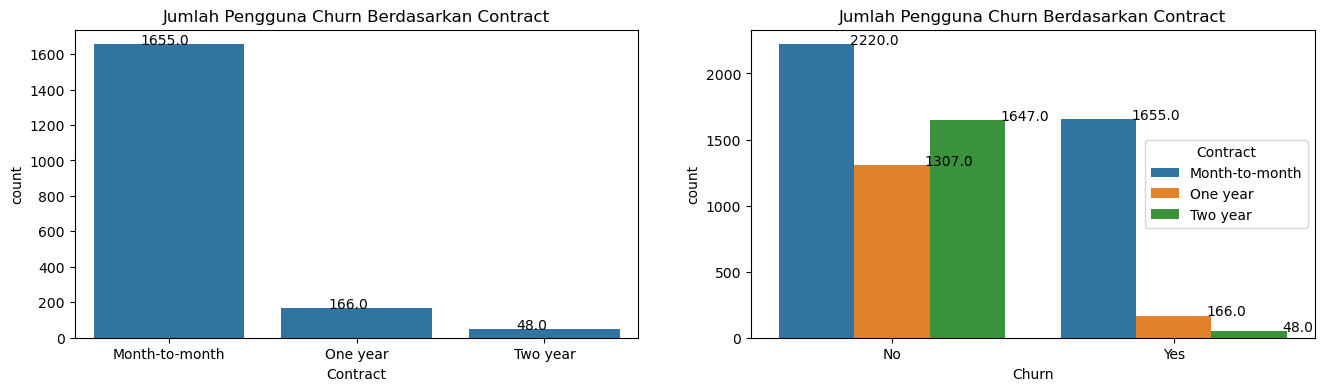

In [118]:
plt.figure(figsize=(16, 4))

ax = plt.subplot (121)
ax = sns.countplot (x = 'Contract', data = cust, order = ['Month-to-month', 'One year', 'Two year'])

for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x() + 0.25, p.get_height() + 0.01))

ax.set_title('Jumlah Pengguna Churn Berdasarkan Contract')

ax = plt.subplot (122)
ax = sns.countplot (x = 'Churn', data = df, hue = 'Contract')

for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x() + 0.25, p.get_height() + 0.01))

ax.set_title('Jumlah Pengguna Churn Berdasarkan Contract')

plt.show()

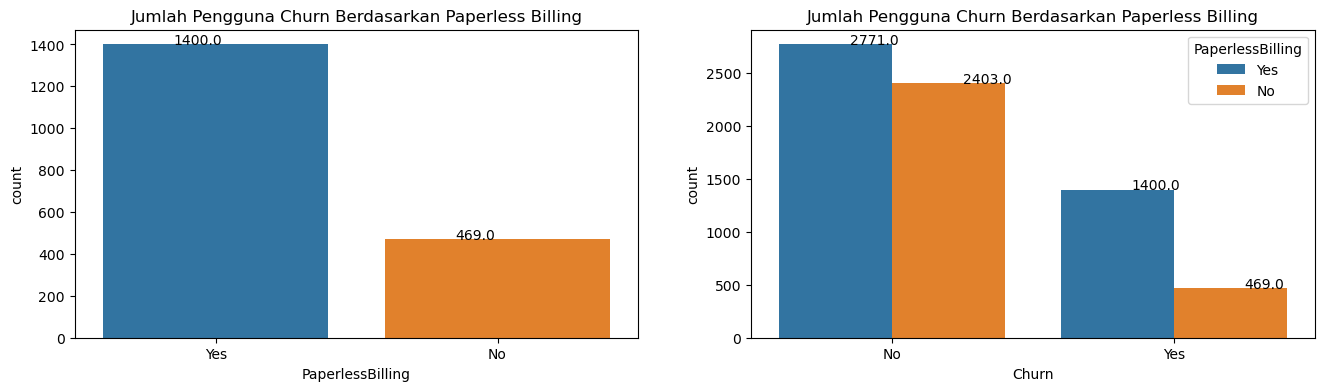

In [116]:
plt.figure(figsize=(16, 4))

ax = plt.subplot (121)
ax = sns.countplot (x = 'PaperlessBilling', data = cust, hue = 'PaperlessBilling')

for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x() + 0.25, p.get_height() + 0.01))

ax.set_title('Jumlah Pengguna Churn Berdasarkan Paperless Billing')

ax = plt.subplot (122)
ax = sns.countplot (x = 'Churn', data = df, hue = 'PaperlessBilling')

for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x() + 0.25, p.get_height() + 0.01))

ax.set_title('Jumlah Pengguna Churn Berdasarkan Paperless Billing')

plt.show()

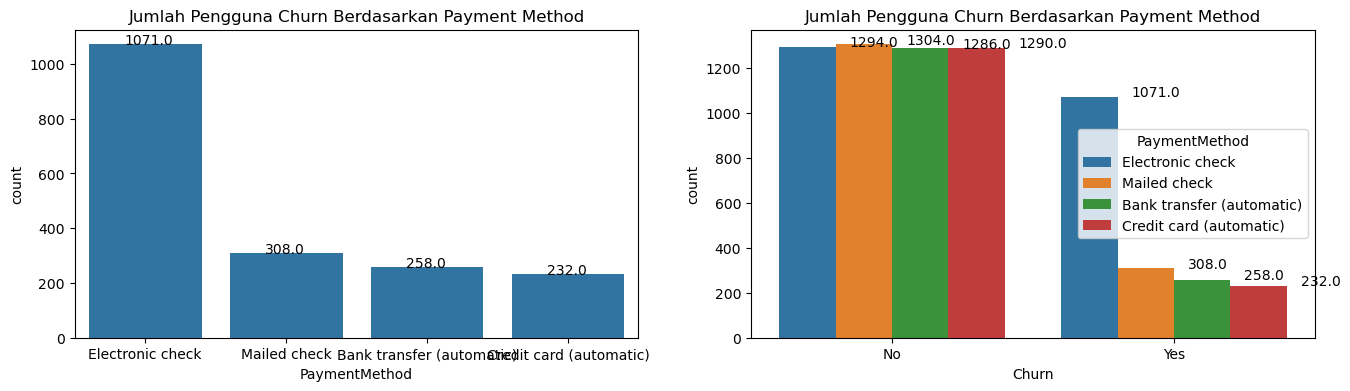

In [120]:
plt.figure(figsize=(16, 4))

ax = plt.subplot (121)
ax = sns.countplot (x = 'PaymentMethod', data = cust, order = ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)'])

for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x() + 0.25, p.get_height() + 0.01))

ax.set_title('Jumlah Pengguna Churn Berdasarkan Payment Method')

ax = plt.subplot (122)
ax = sns.countplot (x = 'Churn', data = df, hue = 'PaymentMethod')

for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x() + 0.25, p.get_height() + 0.01))

ax.set_title('Jumlah Pengguna Churn Berdasarkan Payment Method')

plt.show()

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

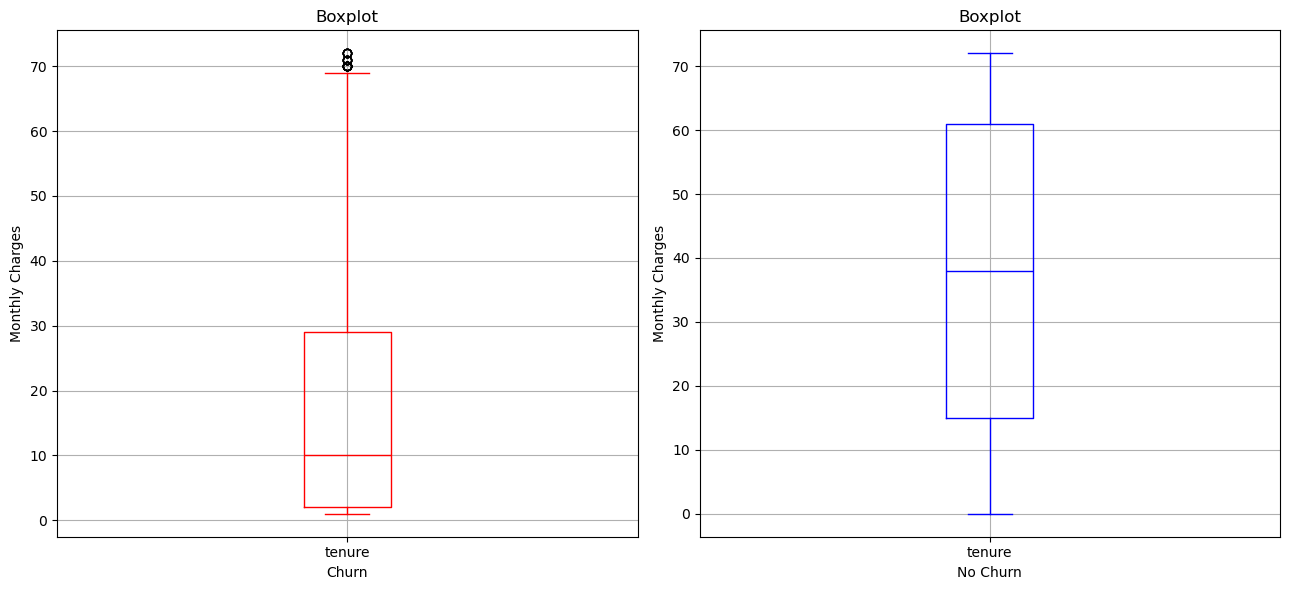

In [113]:
fig = plt.figure(figsize=(13, 6))

ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

dist1.plot(kind='box', color = 'red', vert = True, ax=ax0, grid=True)
ax0.set_title('Boxplot')
ax0.set_xlabel('Churn')
ax0.set_ylabel('Monthly Charges')

dist2.plot(kind='box', color = 'blue', vert = True, ax=ax1, grid=True)
ax1.set_title('Boxplot')
ax1.set_xlabel('No Churn')
ax1.set_ylabel('Monthly Charges')

plt.tight_layout()
plt.show()

4th Observation : Relation between churn and customer account:
tenure - majority less than 15 months
Contract - majority month-to-month
Paperless billing - majority with
Payment method - electronic check
Monthly charges - Majority in range of $80 to 100
It appears that most subscribers who churn are with the telco for less than 10 months. They have a month-by-month contract which offers little discentive for churn, majority has paperless billing with monthly charges in the range of 80 compared to those who do not churn most of whom pay 62.

In [112]:
print("\n--- Analisis Variabel Target (Churn) ---")
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Distribusi Churn Pelanggan')
plt.xlabel('Churn (0 = Tidak Churn, 1 = Churn)')
plt.ylabel('Jumlah Pelanggan')
plt.savefig('churn_distribution.png')
plt.close()

churn_percentage = df['Churn'].value_counts(normalize=True) * 100
print(f"Persentase Churn:\n{churn_percentage}")


--- Analisis Variabel Target (Churn) ---
Persentase Churn:
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


In [ ]:
print("Distribusi Target (Churn):")
print(df['Churn'].value_counts(normalize=True))
df['Churn'].value_counts(normalize=True).plot(kind='bar', color= ['skyblue', 'salmon'], title='Distribusi Target (Churn)')
plt.xticks([0, 1], ['Tidak Churn', 'Churn'], rotation=0)
plt.ylabel('Proporsi')

Distribusi Target (Churn):
Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64


Text(0, 0.5, 'Proporsi')


Menghitung korelasi antar fitur numerik...


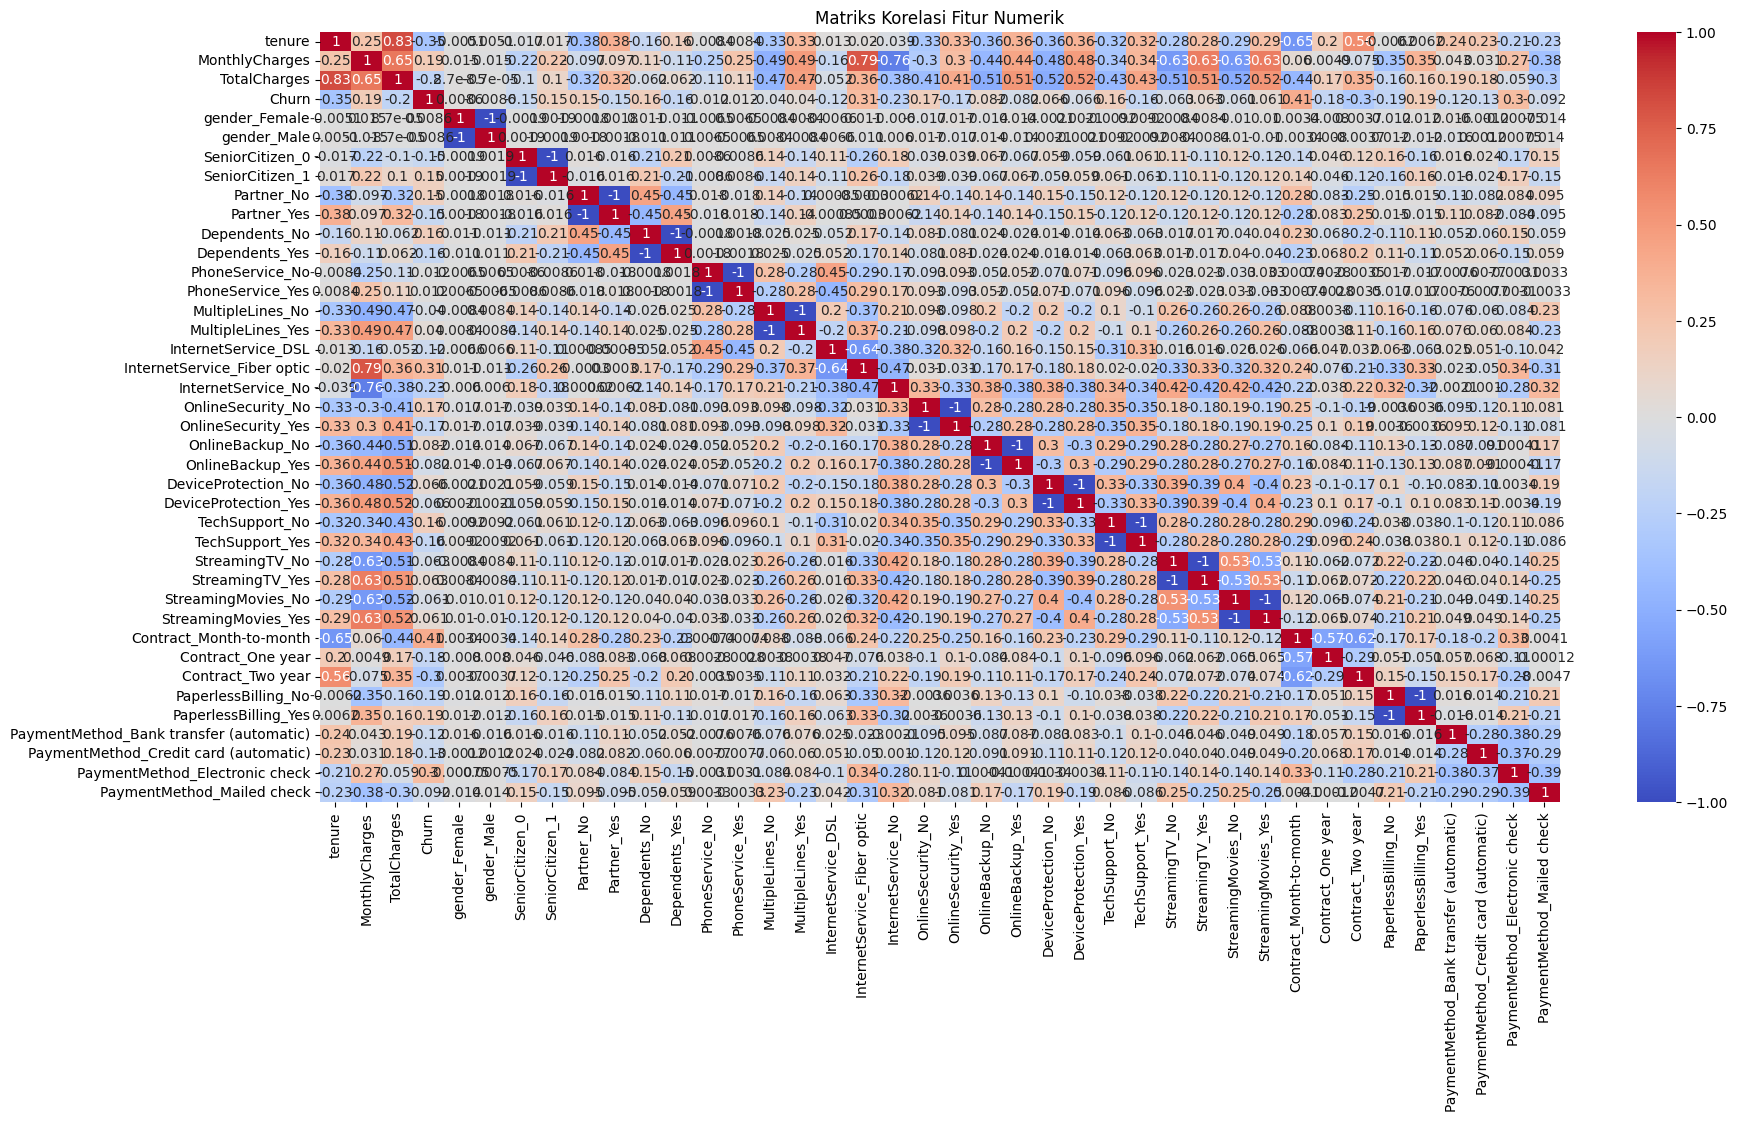

In [ ]:
print("\nMenghitung korelasi antar fitur numerik...")
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Matriks Korelasi Fitur Numerik")
plt.show()